>## **TELECOM CUSTOMER CHURN PREDICTION PROJECT**

### **Project Overview**
This project aims to build a machine learning model to predict customer churn in the telecom industry. Churn prediction helps identify customers likely to leave the service, enabling proactive retention strategies.

### **Business Problem**
Customer churn significantly impacts telecom companies due to high customer acquisition costs. Predicting churn allows the business to retain high-risk customers through targeted interventions.

### **Business Understanding**
* *Stakeholders:* Marketing, Customer Service, Senior Management
* *Key Use:* Preventing customer churn via proactive engagement

Primary **Objectives** include:
- Reduce customer churn by identifying high-risk customers.
- Improve retention strategies by understanding churn factors.
- Minimize customer acquisition costs by maximizing customer lifetime value.

## 【1】*Imports and Data Loading* 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression



In [2]:
# Load the dataset
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
# Display the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 【2】*Exploratory Data Analysis(EDA)* 

In [3]:
# Show basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

.info() helps us check for missing values, column types, number of rows and the total number of columns. Our data frame has 3333 Rows and 21 columns

In [4]:
# Check for the shape of the dataset
df.shape

(3333, 21)

In [5]:
# Confirm if there are any missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# Summary statistics of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


.describe() shows the averages, medians, minimum, maximum, standard deviation and upper&lower quartiles for the numeric columns.

In [7]:
# Churn value counts
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

This output shows that out of 3333 customers, 2850 did not churn (`False`) and 483 did churn (`True`). 

Checking value counts helps us understand our target variable’s distribution and guides our modeling and evaluation strategy.

**Why is this important?**
- It reveals that your dataset is imbalanced, with far more non-churned customers than churned ones.
- Imbalanced data can bias your model towards predicting the majority class (non-churn).
- Knowing this helps you decide if you need to use techniques like resampling, class weighting, or special evaluation metrics (like ROC-AUC, F1-score) to properly assess your model’s performance.


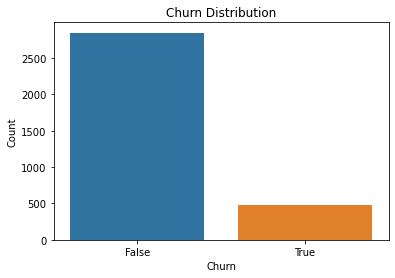

In [8]:
# Plotting the distribution of churn
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show();

- The blue bar represents customers who did **not** churn (`False`) which indicates there are many more customers who stayed (2850).
- The orange bar represents customers who **did** churn (`True`) which shows fewer customers left (483).
This implies that the data is **imbalanced** since, there are far more non-churned customers than churned ones.
Special techniques may be needed to handle this, such as resampling or using evaluation metrics like F1-score or ROC-AUC.

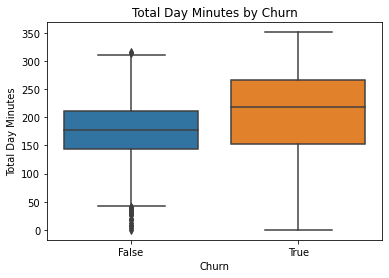

In [9]:
# Boxplot for total day minutes by churn
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Total Day Minutes by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show();

This boxplot compares the distribution of **total day minutes** between customers who churned and those who did not:

The **Blue box** represents customers who did **not** churn and the **Orange box** represents customers who **did** churn.

Explanation;
- Customers who churned generally have higher total day minutes than those who did not churn (the orange box is shifted higher).
- The median (middle line in each box) is higher for churned customers.
- There are some outliers among non-churned customers (dots below the blue box).

This is important because; 
- It suggests that customers who spend more minutes on calls during the day are more likely to churn.
- This feature (**total day minutes**) could be important for predicting churn in your model.

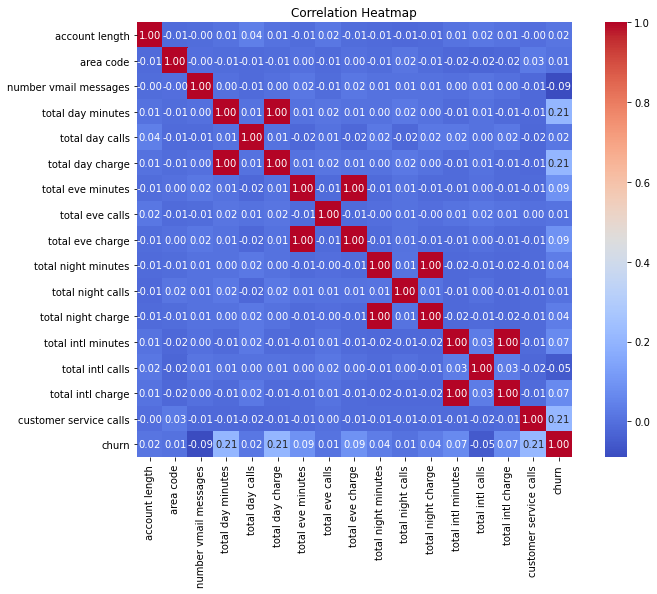

In [10]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show();

This is a **correlation heatmap** showing the relationships between all pairs of numerical features in our dataset which is useful for feature selection and understanding our data structure before modeling

**How to interpret it:**
- Each cell shows the correlation coefficient (from -1 to 1) between two features.
- Values close to **1** (red) mean a strong positive correlation: as one feature increases, so does the other.
- Values close to **-1** (blue) mean a strong negative correlation: as one feature increases, the other decreases.
- Values near **0** (white/light blue) mean little or no linear relationship.

This tells us that;
 - The diagonal is always 1.00 because each feature is perfectly correlated with itself.
 - Most off-diagonal values are close to 0, indicating weak or no linear relationships between most features.
 - You can use this heatmap to spot highly correlated features, which may be redundant for modeling.
 - Look for features that have a higher correlation with the target variable (`churn`). These may be more important for prediction.


## 【3】*Data Preprocessing* 

In [11]:
# Drop identifier
df.drop(columns=["phone number"], inplace=True)

In [12]:
df.shape

(3333, 20)

In [13]:
# Convert churn to numeric
df['churn'] = df['churn'].astype(int)

In [14]:
df["churn"].dtypes

dtype('int32')

In [15]:
# Define categorical and numeric features
categorical_cols = ['state', 'area code', 'international plan', 'voice mail plan']
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['churn']]

In [17]:
# One-hot encoding for categorical features
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_features = pd.DataFrame(ohe.fit_transform(df[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))

In [19]:
# Scale numeric features
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

In [21]:
# Combine the processed features
X = pd.concat([ohe_features.reset_index(drop=True), scaled_features.reset_index(drop=True)], axis=1)
y = df['churn']

In [23]:
# Split the dataset into training and testing sets
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Logistic regression model